In [1]:
import numpy as np
import scipy as sp
import scipy.interpolate as interp
import sys,json,os
sys.path.append('../..')
import matplotlib.pyplot as plt
import Project.profiles as pp
import Project.new_profiles as pnp
import Project.plot_assist as pa
from Project.constants import Constants as pc
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
from tabulate import tabulate
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['mathtext.fontset'] = 'dejavuserif'

In [2]:
dmo = json.load(open('../../sim_RC_12/Output/resdicts/dmo_sim_dict.json','r'))
for gal in dmo:
    dmo[gal]['core_fit'] = dmo[gal]['sidm_fit']
    dmo[gal]['cusp_fit'] = dmo[gal]['nfw_fit']
bry = json.load(open('../../sim_RC_12/Output/resdicts/Bry_2sig_dict.json','r'))
bry_1 = json.load(open('../../sim_RC_12/Output/resdicts/Bry_1sig_dict.json','r'))
bry_p5 = json.load(open('../../sim_RC_12/Output/resdicts/Bry_p5sig_dict.json','r'))
sparcd = json.load(open('../../obs_RC_v4/Output/result_dicts/sparc_fit_dict.json','r'))

In [6]:
Bestgals = json.load(open('../Output/Bestgals.json','r'))
cc_75 = Bestgals['CC_75']
hp_75 = Bestgals['HP_75']
cc_hp_75 = Bestgals['CC_HP_75']

In [146]:
M200, C200, Mstar, Bfm = {},{},{},{}
Gals, Clrs = {}, {}
for prior in sparcd.keys():
    M200[prior] = []
    C200[prior] = []
    Mstar[prior] = []
    Bfm[prior] = []
    Gals[prior] = []
    Clrs[prior] = []
    for gal in cc_75:
        bfm = sparcd[prior][gal]['best_fit']
        gald = sparcd[prior][gal][bfm]
        M200[prior].append(gald['m200'])
        C200[prior].append(gald['c200'])
        Mstar[prior].append(gald['mstar'])
        Bfm[prior].append(bfm)
        Gals[prior].append(gal)
        clr = pa.green if bfm == 'cusp_fit' else pa.purple
        Clrs[prior].append(clr)
    M200[prior] = np.array(M200[prior])
    C200[prior] = np.array(C200[prior])
    Mstar[prior] = np.array(Mstar[prior])

In [124]:
def Rmax(m2,c2):
    r200 = pp.r200_nfw(np.log10(m2))
    rs = r200/c2
    return 2.16258*rs
def Vmax(m2,c2):  
    rmax = Rmax(m2,c2)
    rs = pnp.rs_nfw(np.log10(m2),c2)
    return pp.v_nfw(np.log10(m2),rs,rmax)

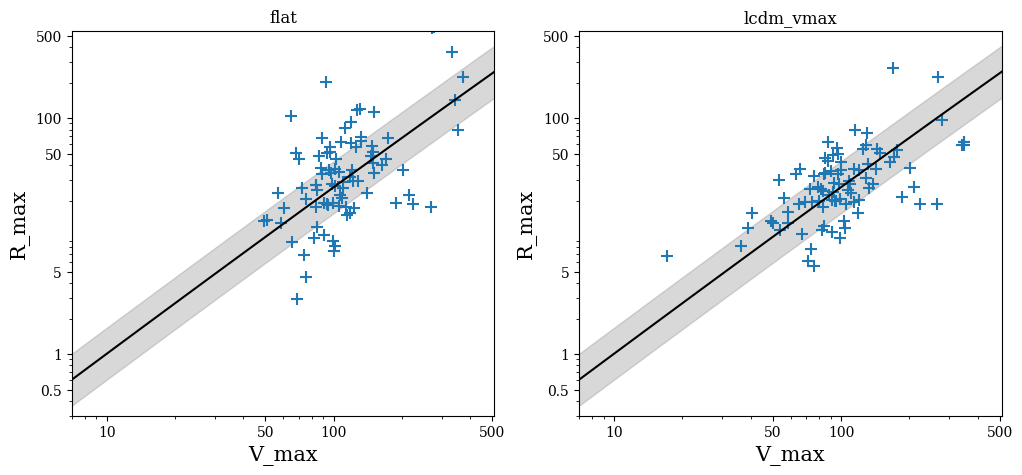

In [147]:
fig,axs = plt.subplots(1,2,figsize = (12,5))
lm = np.linspace(7.,14.,100)
lc = pp.lc200_SR(lm)
x_vmax = Vmax(10**lm,10**lc)
y_rmax = Rmax(10**lm,10**lc)
y_p_rmax = Rmax(10**lm, 10**(lc+0.22))
y_m_rmax = Rmax(10**lm, 10**(lc-0.22))
for ax in axs:
    ax.plot(x_vmax,y_rmax, c = 'k')
    ax.fill_between(x_vmax,y_p_rmax,y_m_rmax, color = 'grey', alpha = 0.3)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel('V_max',size = 15)
    ax.set_ylabel('R_max',size = 15)
    ax.set_xlim(7,510)
    ax.set_ylim(0.3,550)
    ax.set_yticks([0.5,1,5,50,100,500])
    ax.set_yticklabels([0.5,1,5,50,100,500])
    ax.set_xticks([10,50,100,500])
    ax.set_xticklabels([10,50,100,500])

for prior,ax in zip(['flat','lcdm_vmax'],axs):
    m2,em2 = M200[prior][:,0], M200[prior][:,1]
    c2,ec2 = C200[prior][:,0], C200[prior][:,1]
    
    rmax = Rmax(m2,c2)
    vmax = Vmax(m2,c2)
    ax.scatter(vmax,rmax, marker = '+',s = 80)
    ax.set_title(prior)

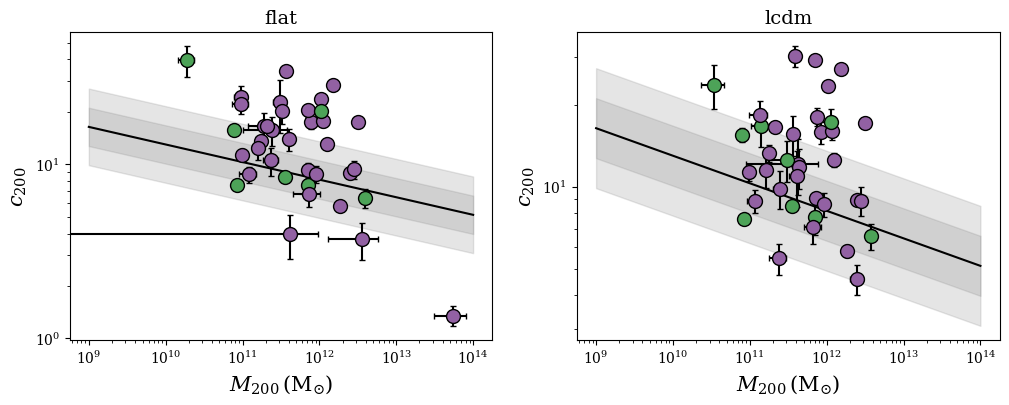

In [105]:
fig, axs = plt.subplots(1,2,figsize = (12,4))
lm = np.linspace(9.,14.,100)
lc = pp.lc200_SR(lm)
for ax in axs:
    ax.plot(10**lm,10**lc, c = 'k')
    ax.fill_between(10**lm, 10**(lc+0.11), 10**(lc-0.11), color = 'grey', alpha = 0.2)
    ax.fill_between(10**lm, 10**(lc+0.22), 10**(lc-0.22), color = 'grey', alpha = 0.2)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('$M_{200}\,(\mathrm{M_{\odot}})$',size = 15)
    ax.set_ylabel('$c_{200}$',size = 15)
    # ax.set_xlim(5e9,1e13)
    # ax.set_ylim(2,50)
    # ax.set_yticks([4,6,8,10,20,30,40])
    # ax.set_yticklabels([4,6,8,10,20,30,40])

for prior,ax in zip(['flat','lcdm'],axs):
    m2,em2 = M200[prior][:,0], M200[prior][:,1]
    c2,ec2 = C200[prior][:,0], C200[prior][:,1]
    for i in range(len(m2)):
        ax.errorbar(m2[i],c2[i],xerr = em2[i], yerr = ec2[i],fmt = 'o',color = Clrs[prior][i],
                    ecolor = 'k',capsize = 2,ms = 10, mec = 'k')
    ax.set_title(prior,size = 14)
    
# axs[1].errorbar(10**(bins+delta/2), 10**(running_median), running_std, fmt = 'o', color = 'k', capsize = 2)

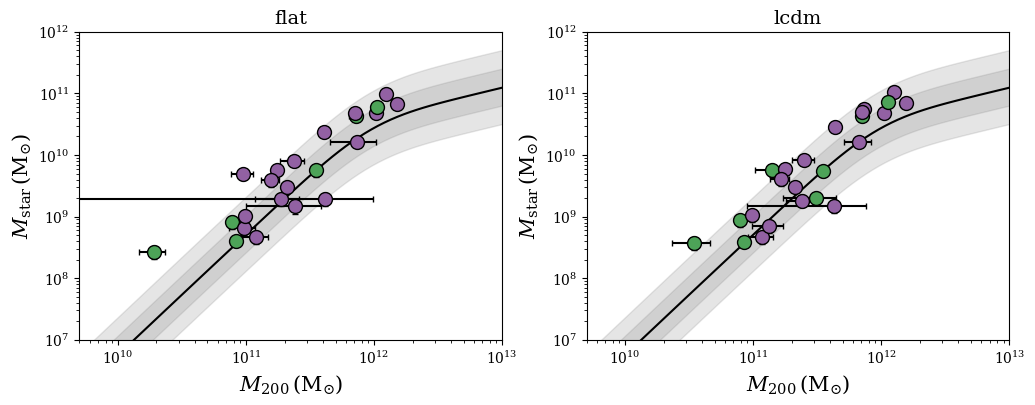

In [77]:
fig,axs = plt.subplots(1,2, figsize = (12,4))
lm = np.linspace(9.,14, 100)
lmstar = pnp.lmstar_behroozi_19(lm)
for ax in axs:
    ax.plot(10**lm,10**lmstar, c = 'k')
    ax.fill_between(10**lm, 10**(lmstar+0.3), 10**(lmstar-0.3), color = 'grey', alpha = 0.2)
    ax.fill_between(10**lm, 10**(lmstar+0.6), 10**(lmstar-0.6), color = 'grey', alpha = 0.2)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('$M_{200}\,(\mathrm{M_{\odot}})$',size = 15)
    ax.set_ylabel('$M_{\mathrm{star}}\,(\mathrm{M_{\odot}})$',size = 15)
    ax.set_xlim(5e9,1e13)
    ax.set_ylim(1e7,1e12)
    
for prior,ax in zip(['flat','lcdm'],axs):
    m2,em2 = M200[prior][:,0], M200[prior][:,1]
    ms,ems = Mstar[prior][:,0], Mstar[prior][:,1]
    for i in range(len(m2)):
        ax.errorbar(m2[i],ms[i],xerr = em2[i], yerr = ems[i],fmt = 'o',color = Clrs[prior][i],
                    ecolor = 'k',capsize = 2,ms = 10, mec = 'k')
    ax.set_title(prior,size = 14)